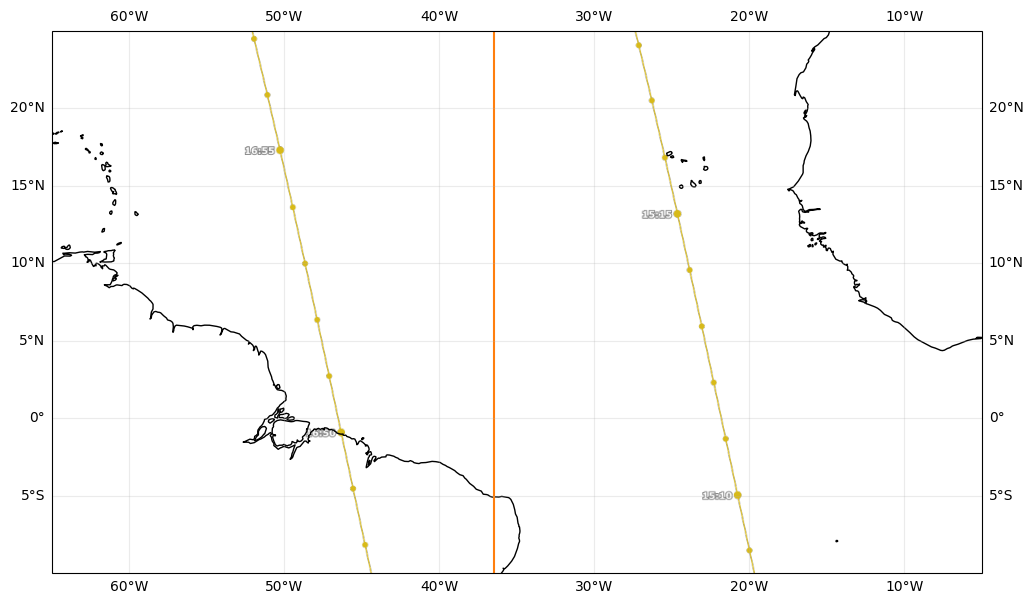

In [3]:
import requests
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from io import BytesIO

time = "2016-08-10T14:00:00Z"
layers = "MODIS_Terra_CorrectedReflectance_TrueColor,OrbitTracks_Calipso_Ascending"
resolution = 0.05  # in degree
bbox = [-10.0, -65.0, 25.0, -5.0]  # S, E, N, W
bbox_str = ",".join([str(v) for v in bbox])
img_format = "png"
width, height = int((bbox[3] - bbox[1]) / resolution), int((bbox[2] - bbox[0]) / resolution)

url = f"https://wvs.earthdata.nasa.gov/api/v1/snapshot?REQUEST=GetSnapshot&TIME={time}&BBOX={bbox_str}&CRS=EPSG:4326&LAYERS={layers}&FORMAT=image/{img_format}&WIDTH={width}&HEIGHT={height}"
r = requests.get(url)

plt.figure(figsize = (12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-65, -5, -10, 25], crs=ccrs.PlateCarree())
ax.coastlines(alpha=1.0)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha = 0.25)

img = plt.imread(BytesIO(r.content))
plt.imshow(img, origin='upper', extent=[-65, -5, -10, 25], transform=ccrs.PlateCarree())

lon_sel = -36.5
plt.plot([lon_sel, lon_sel], [-10, 25], c = 'C1')

In [ ]:
plt.plot([0, 25], [17, 17], c = 'C1')